In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [3]:
bc.target[0]

np.int64(0)

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
bc.data.shape

(569, 30)

# preprocessing

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)


In [8]:
print(f"features=> train: {x_train.shape} - test: {x_test.shape}")
print(f"label=> train: {y_train.shape} - test: {y_test.shape}")

features=> train: (455, 30) - test: (114, 30)
label=> train: (455,) - test: (114,)


In [9]:
x_train[0]

array([1.276e+01, 1.337e+01, 8.229e+01, 5.041e+02, 8.794e-02, 7.948e-02,
       4.052e-02, 2.548e-02, 1.601e-01, 6.140e-02, 3.265e-01, 6.594e-01,
       2.346e+00, 2.518e+01, 6.494e-03, 2.768e-02, 3.137e-02, 1.069e-02,
       1.731e-02, 4.392e-03, 1.419e+01, 1.640e+01, 9.204e+01, 6.188e+02,
       1.194e-01, 2.208e-01, 1.769e-01, 8.411e-02, 2.564e-01, 8.253e-02])

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler  = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
x_train[0]

array([0.27351034, 0.15186722, 0.26604934, 0.15295864, 0.31876862,
       0.20580782, 0.09493908, 0.12664016, 0.27323232, 0.24094356,
       0.07785624, 0.06612447, 0.0748716 , 0.03432587, 0.16252507,
       0.19097546, 0.07921717, 0.20250047, 0.17596775, 0.11913547,
       0.22269655, 0.11673774, 0.20733104, 0.10656705, 0.318497  ,
       0.18774437, 0.14129393, 0.2890378 , 0.1969249 , 0.18030959])

# classification

In [18]:
from sklearn.metrics import accuracy_score , precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test) :
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc_train: {acc_train} - acc_test: {acc_test} - recall_score: {r} - precision_score: {p}")
    return acc_train, acc_test, p, r

# 1. Naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [19]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.945054945054945 - acc_test: 0.9122807017543859 - recall_score: 0.9315068493150684 - precision_score: 0.9315068493150684


## 2.KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [21]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.978021978021978 - acc_test: 0.9736842105263158 - recall_score: 0.9863013698630136 - precision_score: 0.972972972972973


## 3.decition tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [29]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.9210526315789473 - recall_score: 0.9041095890410958 - precision_score: 0.9705882352941176


## 4.random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [31]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9956043956043956 - acc_test: 0.9385964912280702 - recall_score: 0.9178082191780822 - precision_score: 0.9852941176470589


## 5.SVM

In [35]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train, y_train)

SVC(kernel='poly')

In [36]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9868131868131869 - acc_test: 0.9912280701754386 - recall_score: 1.0 - precision_score: 0.9864864864864865


## 6.Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9692307692307692 - acc_test: 0.9824561403508771 - recall_score: 1.0 - precision_score: 0.9733333333333334


## 7.ANN

In [46]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu', solver='adam', batch_size=64)
ann.fit(x_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=1024)

In [47]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9868131868131869 - acc_test: 0.9912280701754386 - recall_score: 1.0 - precision_score: 0.9864864864864865


## comparison

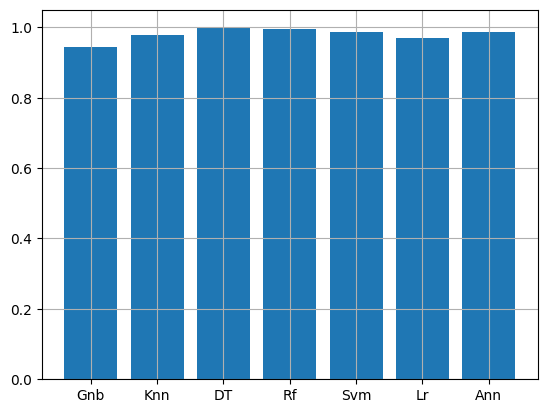

In [51]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm,acc_train_lr, acc_train_ann]
title = ["Gnb", 'Knn', 'DT', 'Rf', 'Svm', 'Lr' , 'Ann']
plt.bar(title, acc_train)
plt.grid()
plt.show()


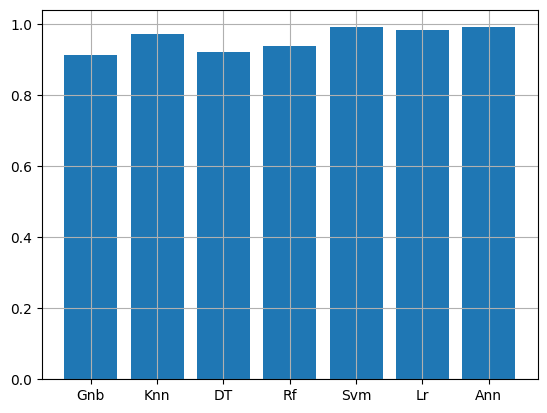

In [52]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm , acc_test_lr, acc_test_ann]
title = ["Gnb", 'Knn', 'DT', 'Rf', 'Svm', 'Lr' , 'Ann']
plt.bar(title, acc_test)
plt.grid()
plt.show()

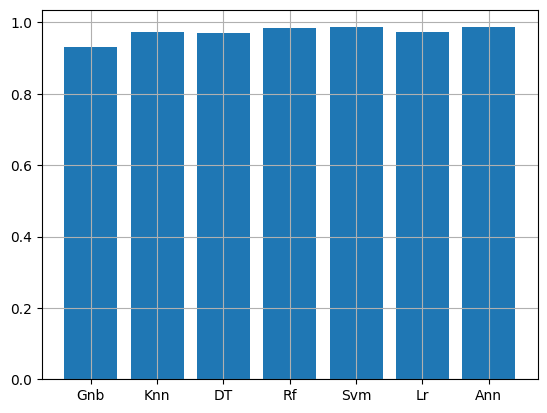

In [56]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm , p_lr, p_ann]
title = ["Gnb", 'Knn', 'DT', 'Rf', 'Svm', 'Lr' , 'Ann']
plt.bar(title, p )
plt.grid()
plt.show()

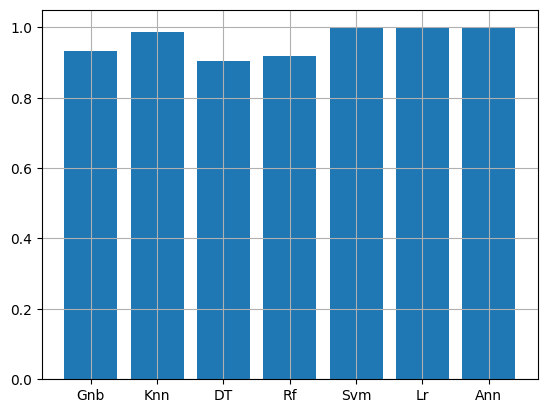

In [57]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm , r_lr, r_ann]
title = ["Gnb", 'Knn', 'DT', 'Rf', 'Svm', 'Lr' , 'Ann']
plt.bar(title, r )
plt.grid()
plt.show()